<a href="https://colab.research.google.com/github/PRATIK-HUB1/AI_Final_Portfolio_Project/blob/main/2548392_Pratik_Shah_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Cell 1: Dataset Loading and Feature–Target Separation


In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/heart_disease.csv")

# Display basic dataset information
print("Dataset Shape:", df.shape)
print("\nColumn Names:")
print(df.columns)

# Separate features and target
X = df.drop(columns=["Heart Disease Status"])
y = df["Heart Disease Status"]

# Verify separation
print("\nFeature Matrix Shape (X):", X.shape)
print("Target Vector Shape (y):", y.shape)

# Preview features and target
X.head(), y.head()



Dataset Shape: (10000, 21)

Column Names:
Index(['Age', 'Gender', 'Blood Pressure', 'Cholesterol Level',
       'Exercise Habits', 'Smoking', 'Family Heart Disease', 'Diabetes', 'BMI',
       'High Blood Pressure', 'Low HDL Cholesterol', 'High LDL Cholesterol',
       'Alcohol Consumption', 'Stress Level', 'Sleep Hours',
       'Sugar Consumption', 'Triglyceride Level', 'Fasting Blood Sugar',
       'CRP Level', 'Homocysteine Level', 'Heart Disease Status'],
      dtype='object')

Feature Matrix Shape (X): (10000, 20)
Target Vector Shape (y): (10000,)


(    Age  Gender  Blood Pressure  Cholesterol Level Exercise Habits Smoking  \
 0  56.0    Male           153.0              155.0            High     Yes   
 1  69.0  Female           146.0              286.0            High      No   
 2  46.0    Male           126.0              216.0             Low      No   
 3  32.0  Female           122.0              293.0            High     Yes   
 4  60.0    Male           166.0              242.0             Low     Yes   
 
   Family Heart Disease Diabetes        BMI High Blood Pressure  \
 0                  Yes       No  24.991591                 Yes   
 1                  Yes      Yes  25.221799                  No   
 2                   No       No  29.855447                  No   
 3                  Yes       No  24.130477                 Yes   
 4                  Yes      Yes  20.486289                 Yes   
 
   Low HDL Cholesterol High LDL Cholesterol Alcohol Consumption Stress Level  \
 0                 Yes                  

## Cell 2: Data Cleaning


In [3]:
# 1. Check data types
print("Data Types:\n")
print(df.dtypes)

# 2. Check missing values
print("\nMissing Values per Column:\n")
print(df.isnull().sum())

# 3. Check duplicate rows
duplicate_count = df.duplicated().sum()
print("\nNumber of Duplicate Rows:", duplicate_count)

# 4. Remove duplicates if any
if duplicate_count > 0:
    df = df.drop_duplicates()
    print("Duplicates removed. New shape:", df.shape)
else:
    print("No duplicate rows found.")

# 5. Verify target variable values
print("\nTarget Variable Distribution:")
print(y.value_counts())


Data Types:

Age                     float64
Gender                   object
Blood Pressure          float64
Cholesterol Level       float64
Exercise Habits          object
Smoking                  object
Family Heart Disease     object
Diabetes                 object
BMI                     float64
High Blood Pressure      object
Low HDL Cholesterol      object
High LDL Cholesterol     object
Alcohol Consumption      object
Stress Level             object
Sleep Hours             float64
Sugar Consumption        object
Triglyceride Level      float64
Fasting Blood Sugar     float64
CRP Level               float64
Homocysteine Level      float64
Heart Disease Status     object
dtype: object

Missing Values per Column:

Age                       29
Gender                    19
Blood Pressure            19
Cholesterol Level         30
Exercise Habits           25
Smoking                   25
Family Heart Disease      21
Diabetes                  30
BMI                       22
High Blood 

## Cell 3: Exploratory Data Analysis (Data Visualization)


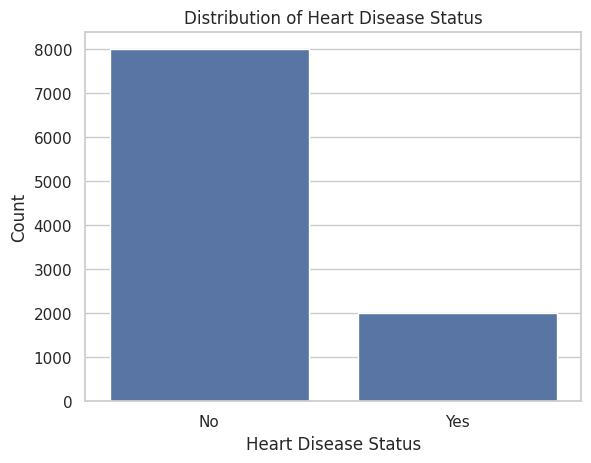

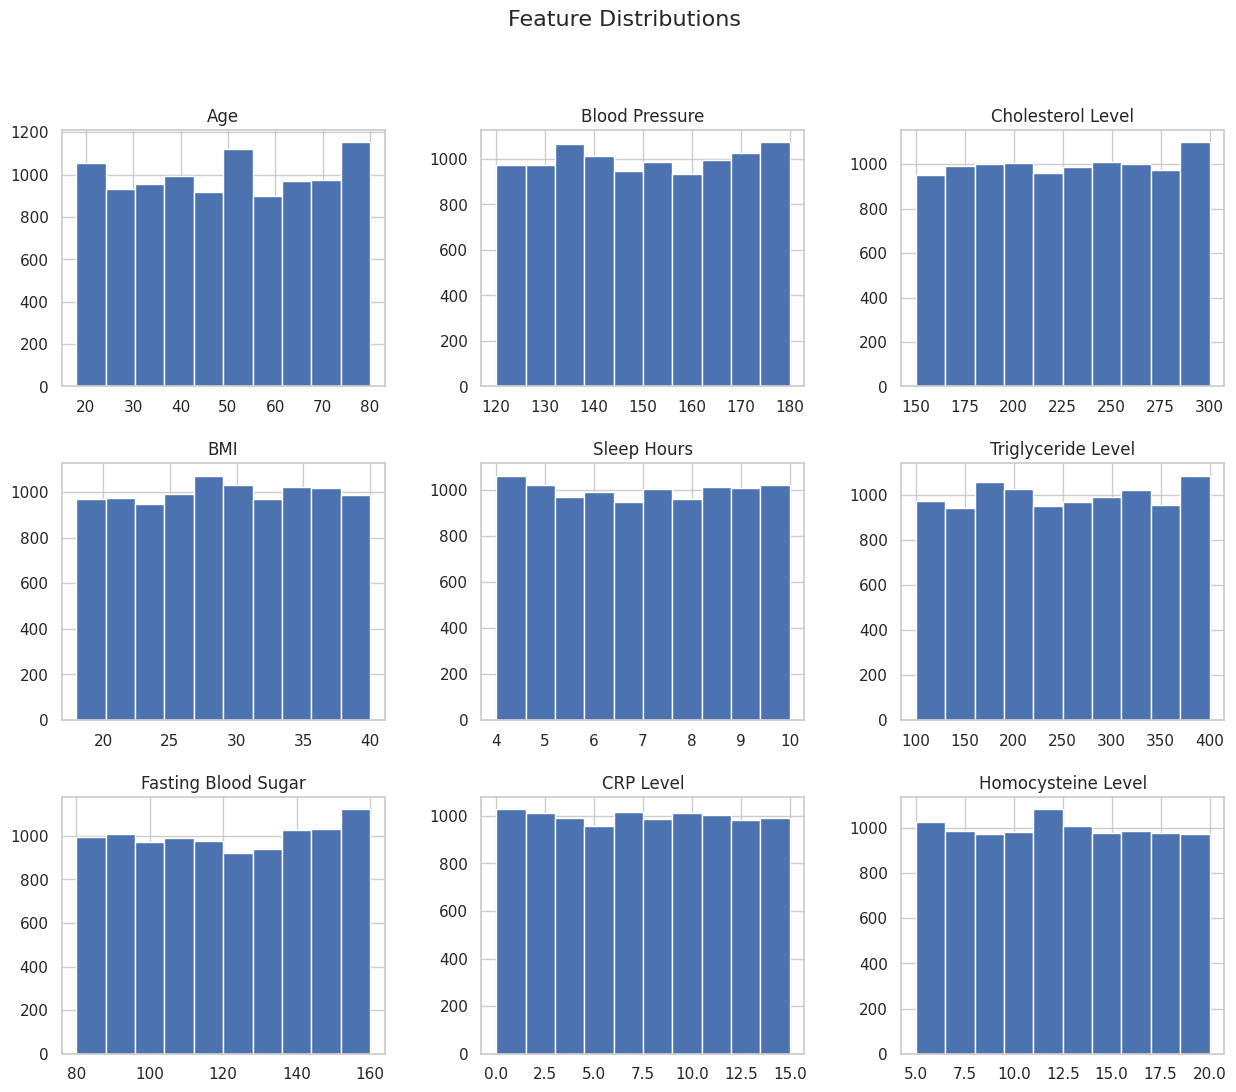

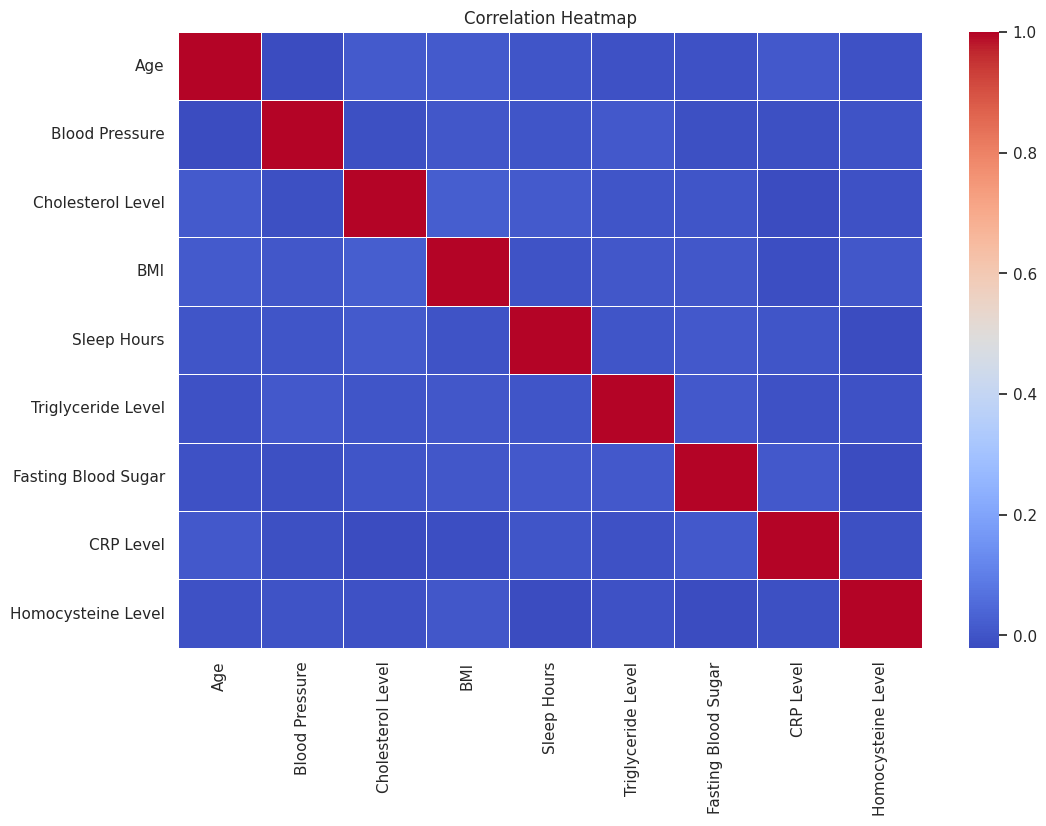

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for clarity
sns.set(style="whitegrid")

# -------------------------------
# 1. Target Variable Distribution
# -------------------------------
plt.figure()
sns.countplot(x=y)
plt.title("Distribution of Heart Disease Status")
plt.xlabel("Heart Disease Status")
plt.ylabel("Count")
plt.savefig("target_distribution.png")
plt.show()

# -------------------------------
# 2. Feature Distributions
# -------------------------------
X.hist(figsize=(15, 12))
plt.suptitle("Feature Distributions", fontsize=16)
plt.savefig("feature_distributions.png")
plt.show()

# -------------------------------
# 3. Correlation Heatmap
# -------------------------------
plt.figure(figsize=(12, 8))
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.savefig("correlation_heatmap.png")
plt.show()


## Cell 4: Train–Test Split


In [5]:
from sklearn.model_selection import train_test_split

# Perform stratified split to preserve class distribution
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Verify split sizes
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

# Verify class distribution
print("\nTraining target distribution:")
print(y_train.value_counts(normalize=True))

print("\nTesting target distribution:")
print(y_test.value_counts(normalize=True))


Training set size: (8000, 20)
Testing set size: (2000, 20)

Training target distribution:
Heart Disease Status
No     0.8
Yes    0.2
Name: proportion, dtype: float64

Testing target distribution:
Heart Disease Status
No     0.8
Yes    0.2
Name: proportion, dtype: float64


## Cell 5: Building Primary Classification Models


In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

# Identify column types
categorical_cols = X.select_dtypes(include=["object"]).columns
numerical_cols = X.select_dtypes(exclude=["object"]).columns

# Preprocessing for numerical data
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median"))
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

# Combine preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_cols),
        ("cat", categorical_transformer, categorical_cols)
    ]
)

# Logistic Regression pipeline
log_reg = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(
        max_iter=5000,
        solver="lbfgs",
        random_state=42
    ))
])

# Decision Tree pipeline
dt_clf = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", DecisionTreeClassifier(random_state=42))
])

# Train models
log_reg.fit(X_train, y_train)
dt_clf.fit(X_train, y_train)

# Predictions
y_pred_log = log_reg.predict(X_test)
y_pred_dt = dt_clf.predict(X_test)


## Cell 6: Initial Model Evaluation


In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

POS_LABEL = "Yes"  # Heart disease present

# Logistic Regression metrics
log_accuracy = accuracy_score(y_test, y_pred_log)
log_precision = precision_score(y_test, y_pred_log, pos_label=POS_LABEL)
log_recall = recall_score(y_test, y_pred_log, pos_label=POS_LABEL)
log_f1 = f1_score(y_test, y_pred_log, pos_label=POS_LABEL)

# Decision Tree metrics
dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_precision = precision_score(y_test, y_pred_dt, pos_label=POS_LABEL)
dt_recall = recall_score(y_test, y_pred_dt, pos_label=POS_LABEL)
dt_f1 = f1_score(y_test, y_pred_dt, pos_label=POS_LABEL)

# Display results
print("Logistic Regression Performance:")
print(f"Accuracy : {log_accuracy:.4f}")
print(f"Precision: {log_precision:.4f}")
print(f"Recall   : {log_recall:.4f}")
print(f"F1-Score : {log_f1:.4f}")

print("\nDecision Tree Performance:")
print(f"Accuracy : {dt_accuracy:.4f}")
print(f"Precision: {dt_precision:.4f}")
print(f"Recall   : {dt_recall:.4f}")
print(f"F1-Score : {dt_f1:.4f}")

# Full classification reports
print("\nClassification Report - Logistic Regression")
print(classification_report(y_test, y_pred_log))

print("\nClassification Report - Decision Tree")
print(classification_report(y_test, y_pred_dt))


Logistic Regression Performance:
Accuracy : 0.8000
Precision: 0.0000
Recall   : 0.0000
F1-Score : 0.0000

Decision Tree Performance:
Accuracy : 0.6625
Precision: 0.2004
Recall   : 0.2300
F1-Score : 0.2142

Classification Report - Logistic Regression
              precision    recall  f1-score   support

          No       0.80      1.00      0.89      1600
         Yes       0.00      0.00      0.00       400

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.64      0.80      0.71      2000


Classification Report - Decision Tree
              precision    recall  f1-score   support

          No       0.80      0.77      0.79      1600
         Yes       0.20      0.23      0.21       400

    accuracy                           0.66      2000
   macro avg       0.50      0.50      0.50      2000
weighted avg       0.68      0.66      0.67      2000



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_

## Cell 7: Neural Network Model (MLP Classifier)


In [8]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler

# Reuse preprocessing with scaling for NN
numeric_transformer_nn = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer_nn = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor_nn = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer_nn, numerical_cols),
        ("cat", categorical_transformer_nn, categorical_cols)
    ]
)

# Define Neural Network architecture
mlp_clf = Pipeline(steps=[
    ("preprocessor", preprocessor_nn),
    ("classifier", MLPClassifier(
        hidden_layer_sizes=(64, 32),
        activation="relu",
        solver="adam",
        max_iter=500,
        random_state=42
    ))
])

# Train Neural Network
mlp_clf.fit(X_train, y_train)

# Predictions
y_pred_mlp = mlp_clf.predict(X_test)

# Evaluation
POS_LABEL = "Yes"

mlp_accuracy = accuracy_score(y_test, y_pred_mlp)
mlp_precision = precision_score(y_test, y_pred_mlp, pos_label=POS_LABEL)
mlp_recall = recall_score(y_test, y_pred_mlp, pos_label=POS_LABEL)
mlp_f1 = f1_score(y_test, y_pred_mlp, pos_label=POS_LABEL)

print("Neural Network (MLP) Performance:")
print(f"Accuracy : {mlp_accuracy:.4f}")
print(f"Precision: {mlp_precision:.4f}")
print(f"Recall   : {mlp_recall:.4f}")
print(f"F1-Score : {mlp_f1:.4f}")

print("\nClassification Report - Neural Network")
print(classification_report(y_test, y_pred_mlp))


Neural Network (MLP) Performance:
Accuracy : 0.6750
Precision: 0.2185
Recall   : 0.2425
F1-Score : 0.2299

Classification Report - Neural Network
              precision    recall  f1-score   support

          No       0.81      0.78      0.79      1600
         Yes       0.22      0.24      0.23       400

    accuracy                           0.68      2000
   macro avg       0.51      0.51      0.51      2000
weighted avg       0.69      0.68      0.68      2000



/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


## Cell 8: Hyperparameter Optimization with Cross-Validation


In [9]:
from sklearn.model_selection import GridSearchCV

# -------------------------------
# Logistic Regression Grid Search
# -------------------------------
log_param_grid = {
    "classifier__C": [0.01, 0.1, 1, 10],
    "classifier__penalty": ["l2"]
}

log_grid = GridSearchCV(
    estimator=log_reg,
    param_grid=log_param_grid,
    scoring="f1",
    cv=5,
    n_jobs=-1
)

log_grid.fit(X_train, y_train)

print("Best Logistic Regression Parameters:")
print(log_grid.best_params_)
print("Best Logistic Regression CV F1-score:")
print(log_grid.best_score_)

# -------------------------------
# Decision Tree Grid Search
# -------------------------------
dt_param_grid = {
    "classifier__max_depth": [None, 5, 10, 20],
    "classifier__min_samples_split": [2, 5, 10],
    "classifier__min_samples_leaf": [1, 2, 4]
}

dt_grid = GridSearchCV(
    estimator=dt_clf,
    param_grid=dt_param_grid,
    scoring="f1_macro",
    cv=5,
    n_jobs=-1
)

dt_grid.fit(X_train, y_train)

print("\nBest Decision Tree Parameters:")
print(dt_grid.best_params_)
print("Best Decision Tree CV F1-score:")
print(dt_grid.best_score_)


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan]
  warnings.warn(


Best Logistic Regression Parameters:
{'classifier__C': 0.01, 'classifier__penalty': 'l2'}
Best Logistic Regression CV F1-score:
nan

Best Decision Tree Parameters:
{'classifier__max_depth': None, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 10}
Best Decision Tree CV F1-score:
0.5115268178886775


## Cell 9: Feature Selection using Embedded Method


In [10]:
import numpy as np

# Get the best Decision Tree model from GridSearch
best_dt_model = dt_grid.best_estimator_

# Fit on training data
best_dt_model.fit(X_train, y_train)

# Extract feature names after preprocessing
feature_names = best_dt_model.named_steps["preprocessor"].get_feature_names_out()

# Extract feature importances
importances = best_dt_model.named_steps["classifier"].feature_importances_

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(
    by="Importance", ascending=False
)

# Display top features
feature_importance_df.head(10)


,Feature,Importance
8,num__Homocysteine Level,0.127791
7,num__CRP Level,0.107115
4,num__Sleep Hours,0.100098
3,num__BMI,0.097591
2,num__Cholesterol Level,0.093886
5,num__Triglyceride Level,0.078698
0,num__Age,0.077655
1,num__Blood Pressure,0.067599
6,num__Fasting Blood Sugar,0.064568
13,cat__Exercise Habits_Medium,0.012862


In [27]:
# Select top 10 features
top_features = feature_importance_df.head(10)["Feature"].values

print("Selected Top Features:")
for f in top_features:
    print(f)


Selected Top Features:
num__Homocysteine Level
num__CRP Level
num__Sleep Hours
num__BMI
num__Cholesterol Level
num__Triglyceride Level
num__Age
num__Blood Pressure
num__Fasting Blood Sugar
cat__Exercise Habits_Medium


## Cell 10: Final Model and Comparative Analysis


In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Final Decision Tree with best hyperparameters
final_dt = dt_grid.best_estimator_

# Train final model
final_dt.fit(X_train, y_train)

# Predict on test data
y_pred_final_dt = final_dt.predict(X_test)

# Evaluation metrics
POS_LABEL = "Yes"

final_accuracy = accuracy_score(y_test, y_pred_final_dt)
final_precision = precision_score(y_test, y_pred_final_dt, pos_label=POS_LABEL)
final_recall = recall_score(y_test, y_pred_final_dt, pos_label=POS_LABEL)
final_f1 = f1_score(y_test, y_pred_final_dt, pos_label=POS_LABEL)

print("Final Decision Tree Performance:")
print(f"Accuracy : {final_accuracy:.4f}")
print(f"Precision: {final_precision:.4f}")
print(f"Recall   : {final_recall:.4f}")
print(f"F1-Score : {final_f1:.4f}")


Final Decision Tree Performance:
Accuracy : 0.6890
Precision: 0.1899
Recall   : 0.1700
F1-Score : 0.1794


In [29]:
# Create comparison table
comparison_df = pd.DataFrame({
    "Model": ["Logistic Regression", "Decision Tree", "Neural Network (MLP)"],
    "Accuracy": [log_accuracy, dt_accuracy, mlp_accuracy],
    "Precision": [log_precision, dt_precision, mlp_precision],
    "Recall": [log_recall, dt_recall, mlp_recall],
    "F1-Score": [log_f1, dt_f1, mlp_f1]
})

comparison_df


,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.8000,0.000000,0.0000,0.000000
1,Decision Tree,0.6625,0.200436,0.2300,0.214203
2,Neural Network (MLP),0.6750,0.218468,0.2425,0.229858
